Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

Instruksi Umum:

Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel yang digunakan sebagai variabel bebas (Fitur) dan variabel target (Biaya medis personal).

In [1]:
import numpy as np
import pandas as pd
# baca data dari file CSV
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# pemahaman terhadap data

# ukuran data
data.shape
# info data
data.info()
# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\sukma bagus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


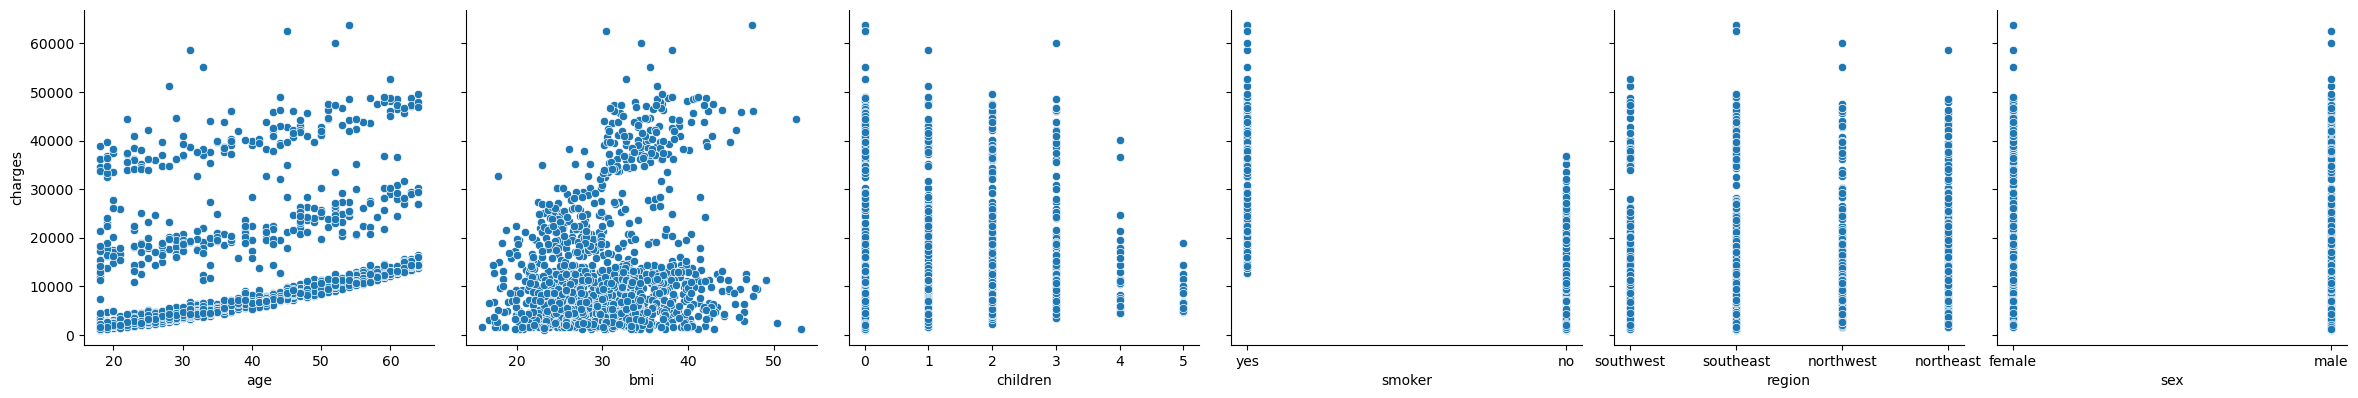

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# operasi visualisasi
sns.pairplot(data, x_vars=['age', 'bmi','children', 'smoker', 'region', 'sex'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

2. Membagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [4]:
#Membagi dataset menjadi data fitur x dan data target y
X = data['charges']
y = data['age']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936,) (402,) (936,) (402,)


In [6]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Lakukan feature scaling

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# Ensure X only contains numeric features before scaling
X = data.select_dtypes(include=['number']).iloc[:, 1:2].values

# You likely intended to scale X which has already been defined
X = sc_X.fit_transform(X)

# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR()

- Feature Scaling: Penskalaan fitur dilakukan menggunakan StandardScaler dari scikit-learn untuk memastikan bahwa variabel numerik X memiliki distribusi dengan mean 0 dan standar deviasi 1, yang diperlukan oleh model SVR agar performanya optimal.

- Pemilihan Fitur Numerik: Baris X = data.select_dtypes(include=['number']).iloc[:, 1:2].values memilih hanya kolom yang berisi data numerik dari dataset data, kemudian mengambil kolom tertentu (indeks 1) untuk digunakan sebagai fitur input.

- Penskalaan Data: Setelah pemilihan fitur, data X di-skala menggunakan sc_X.fit_transform(X) untuk menormalkan fitur input.

- Fitting SVR: Model Support Vector Regression (SVR) dengan kernel Radial Basis Function (RBF) dilatih menggunakan data yang telah di-skala, dengan memanggil regressor.fit(X, y).

4. Membuat model multiple linear regression menggunakan Scikit-Learn

C:\Users\sukma bagus\AppData\Local\Temp\ipykernel_24308\3836882657.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1) # mengatur resolusi tinggi dan kurva menjadi lebih halus


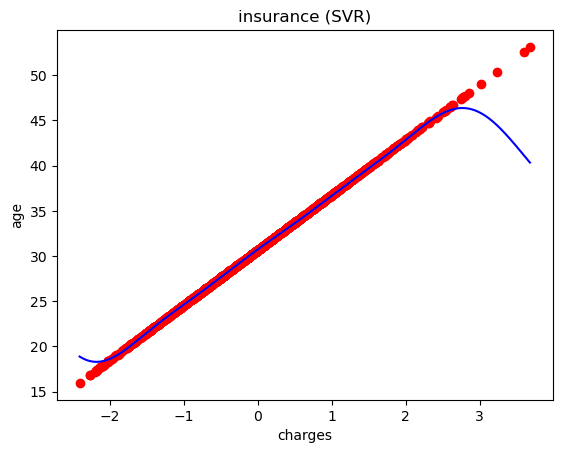

In [8]:
# Visualisasi hasil SVR 
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1) # mengatur resolusi tinggi dan kurva menjadi lebih halus
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('insurance (SVR)')
plt.xlabel('charges')
plt.ylabel('age')
plt.show()

- X_grid untuk resolusi tinggi: X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1) membuat grid nilai X dengan interval 0.01 untuk meningkatkan resolusi dan membuat kurva prediksi lebih halus. Semakin kecil intervalnya, semakin halus kurva yang akan dihasilkan.

- Scatter plot: plt.scatter(X, y, color='red') memplot titik data asli (X dan y) dalam bentuk scatter plot dengan warna merah, sehingga menunjukkan hubungan antara fitur (misalnya "charges") dan target (misalnya "age").

- Plot prediksi: plt.plot(X_grid, regressor.predict(X_grid), color='blue') memplot prediksi model SVR sebagai garis biru yang halus berdasarkan nilai prediksi dari model pada grid X_grid.

Grafik diatas berguna untuk memvisualisasikan performa model SVR dan pola prediksi yang dihasilkan.

5. Latih model pada data latih dan lakukan prediksi data uji

In [9]:
X_train
y_train

966     51
522     51
155     44
671     29
1173    38
        ..
802     21
53      36
350     57
79      41
792     22
Name: age, Length: 936, dtype: int64

In [10]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      34.329287
charges     0.000360
dtype: float64

In [11]:
# Analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.18e-22
Time:                        20:51:26   Log-Likelihood:                -3755.6
No. Observations:                 936   AIC:                             7515.
Df Residuals:                     934   BIC:                             7525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3293      0.646     53.137      0.000      33.061      35.597
charges        0.0004   3.61e-05      9.988      0.000       0.000       0.000
==============================================================================
Omnibus:                      232.868   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.519
Skew:                          -0.031   Prob(JB):                     9.64e-10
Kurtosis:                       1.970   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
print(f'r2: {r_squared}')

r2: 0.07143177723285843


6. Evaluasi dan Tampilkan hasil model dengan menghitung metrik seperti R-squared, MSE, dan MAE. 

In [14]:
# Import library yang diperlukan
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Misalkan X, y, dan regressor sudah ada dan terlatih sebelumnya

# Definisikan scaler untuk variabel fitur dan target
sc_X = StandardScaler()
sc_y = StandardScaler()

# Lakukan penskalaan pada data fitur (X) dan target (y)
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Prediksi hasil
prediksi_umur = np.array([[20]])
prediksi_umur_scaled = sc_X.transform(prediksi_umur)
prediksi_harga_scaled = regressor.predict(prediksi_umur_scaled)

# Kembalikan hasil prediksi ke skala aslinya
prediksi_harga = sc_y.inverse_transform(prediksi_harga_scaled.reshape(-1, 1))

# Menampilkan hasil prediksi
print("Prediksi Harga untuk umur 20:", prediksi_harga[0][0])

# Evaluasi model
y_pred_scaled = regressor.predict(X_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Menghitung metrik evaluasi
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Menampilkan metrik evaluasi
print(f"R-squared: {r_squared}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


Prediksi Harga untuk umur 20: 229.79162642541985
R-squared: -963.1159652592576
MSE: 35826.63601516393
MAE: 186.8598457224343


- StandardScaler digunakan untuk melakukan penskalaan pada data fitur (X) dan target (y).
- Setelah model melakukan prediksi pada umur 20, hasil
prediksi dikembalikan ke skala aslinya menggunakan inverse_transform pada target (sc_y).

**Metrik evaluasi dihitung dengan:**
- r2_score: untuk menghitung nilai R-squared (R²), yaitu seberapa baik model memprediksi.
- mean_squared_error (MSE): untuk menghitung rata-rata kuadrat kesalahan.
- mean_absolute_error (MAE): untuk menghitung rata-rata kesalahan absolut.